<a href="https://colab.research.google.com/github/Seyjuti8884/EDA/blob/main/Spotify_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spotify.csv")

1. Check for Null and Duplicate Values

In [4]:
# Check for null values
null_values = df.isnull().sum()

# Check for duplicates and remove them
duplicates_count = df.duplicated().sum()
spotify_data_cleaned = df.drop_duplicates()

print("Null values:\n", null_values)
print(f"Number of duplicate rows: {duplicates_count}")


Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 27


2. Distribution of Popularity

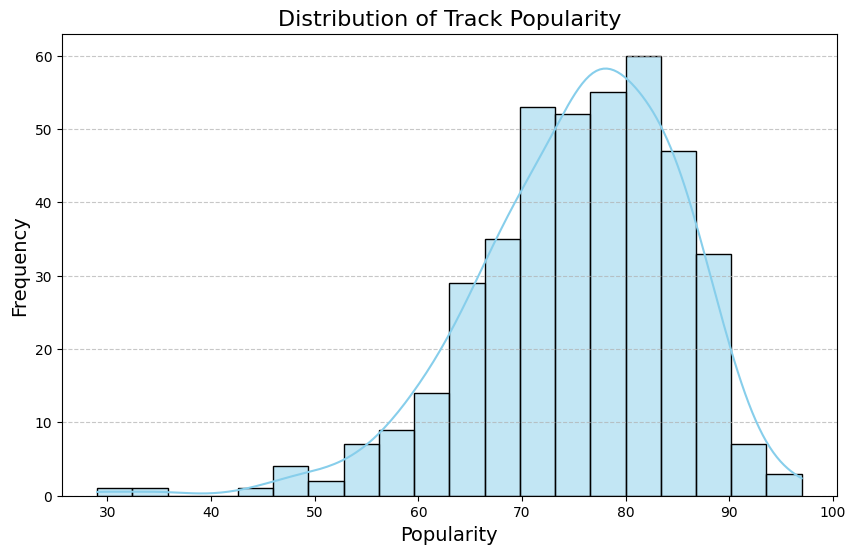

In [5]:
# Histogram of popularity
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(spotify_data_cleaned['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


3. Relationship between popularity and duration (scatter plot)

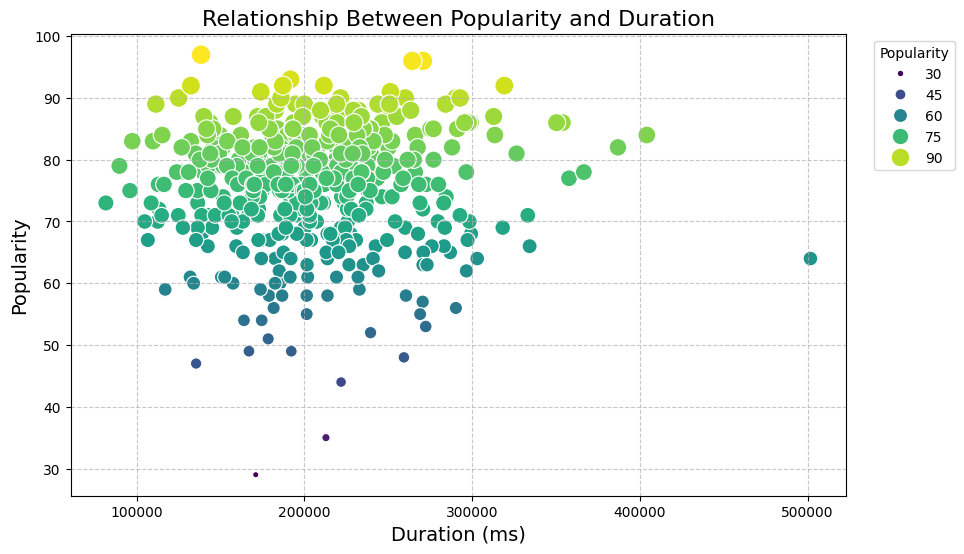

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=spotify_data_cleaned,
    x='Duration (ms)',
    y='Popularity',
    hue='Popularity',
    palette='viridis',
    size='Popularity',
    sizes=(20, 200)
)
plt.title('Relationship Between Popularity and Duration', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Popularity', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


4. Artist with the highest number of tracks

Artist with the highest number of tracks:
Artist
Drake    17
Name: count, dtype: int64


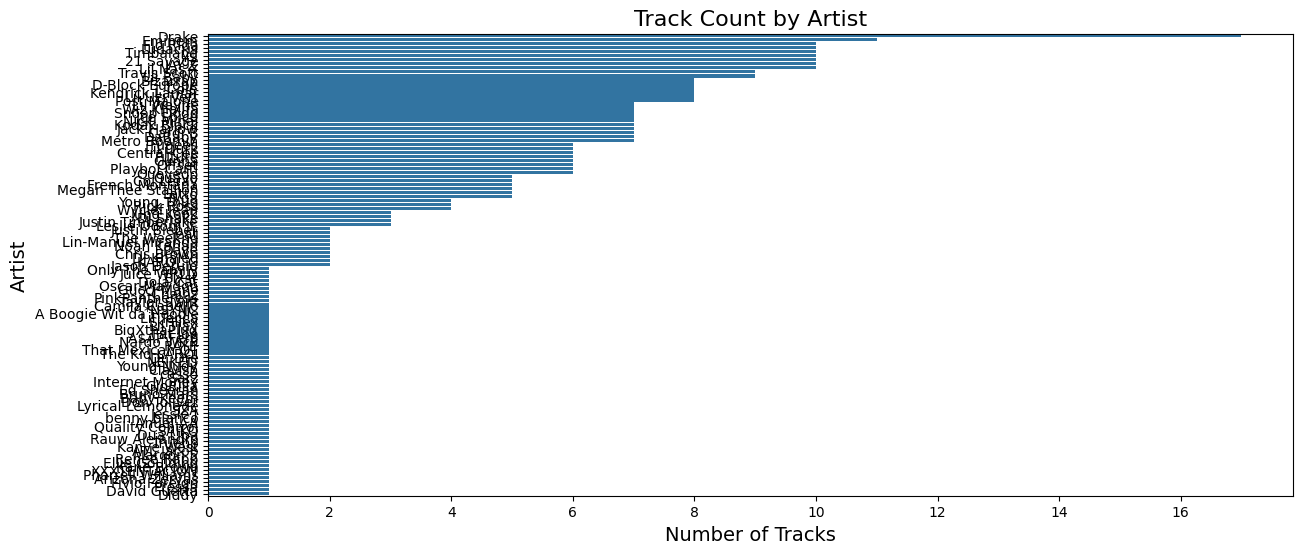

In [7]:
# Count tracks by each artist
artist_track_count = spotify_data_cleaned['Artist'].value_counts()

print("Artist with the highest number of tracks:")
print(artist_track_count.head(1))

# Plot the track count for each artist
plt.figure(figsize=(14, 6))
sns.countplot(data=spotify_data_cleaned, y='Artist', order=spotify_data_cleaned['Artist'].value_counts().index)
plt.title('Track Count by Artist', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.show()


5. Top 5 least popular tracks

In [8]:
# Get the 5 least popular tracks
least_popular_tracks = spotify_data_cleaned.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]

print("Top 5 least popular tracks:")
print(least_popular_tracks)


Top 5 least popular tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


6. Artist with the highest average popularity (top 5 most popular artists)

In [9]:
# Get top 5 artists by total popularity
top_5_artists = spotify_data_cleaned.groupby('Artist')['Popularity'].mean().nlargest(5)

print("Top 5 most popular artists by average popularity:")
print(top_5_artists)


Top 5 most popular artists by average popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


7. Most popular tracks of top 5 artists

In [10]:
top_5_artist_names = top_5_artists.index
top_5_popular_tracks = spotify_data_cleaned[spotify_data_cleaned['Artist'].isin(top_5_artist_names)].sort_values('Popularity', ascending=False)

print("Most popular tracks for top 5 artists:")
print(top_5_popular_tracks[['Artist', 'Track Name', 'Popularity']].head(5))


Most popular tracks for top 5 artists:
           Artist                  Track Name  Popularity
260            ¥$                    CARNIVAL          96
30   Travis Scott  FE!N (feat. Playboi Carti)          93
31   Travis Scott                    I KNOW ?          92
140         cassö                       Prada          92
32   Travis Scott                     MY EYES          91


8. Relationships between numerical variables (pair plot)

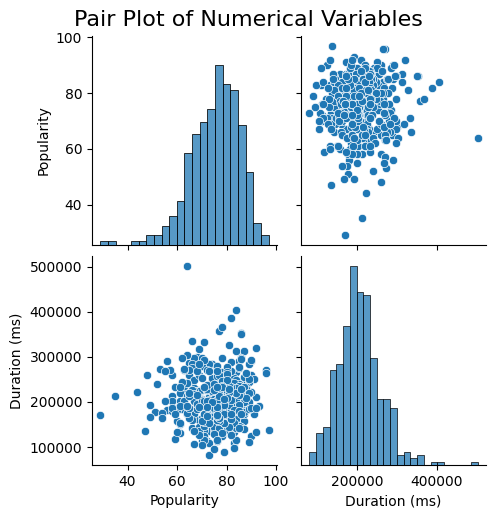

In [11]:
sns.pairplot(spotify_data_cleaned[['Popularity', 'Duration (ms)']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=16)
plt.show()


9. Duration of tracks across different artists (box plot)

<ipython-input-12-1cfb7fbcf723>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_data_cleaned, x='Artist', y='Duration (ms)', palette='Set3')


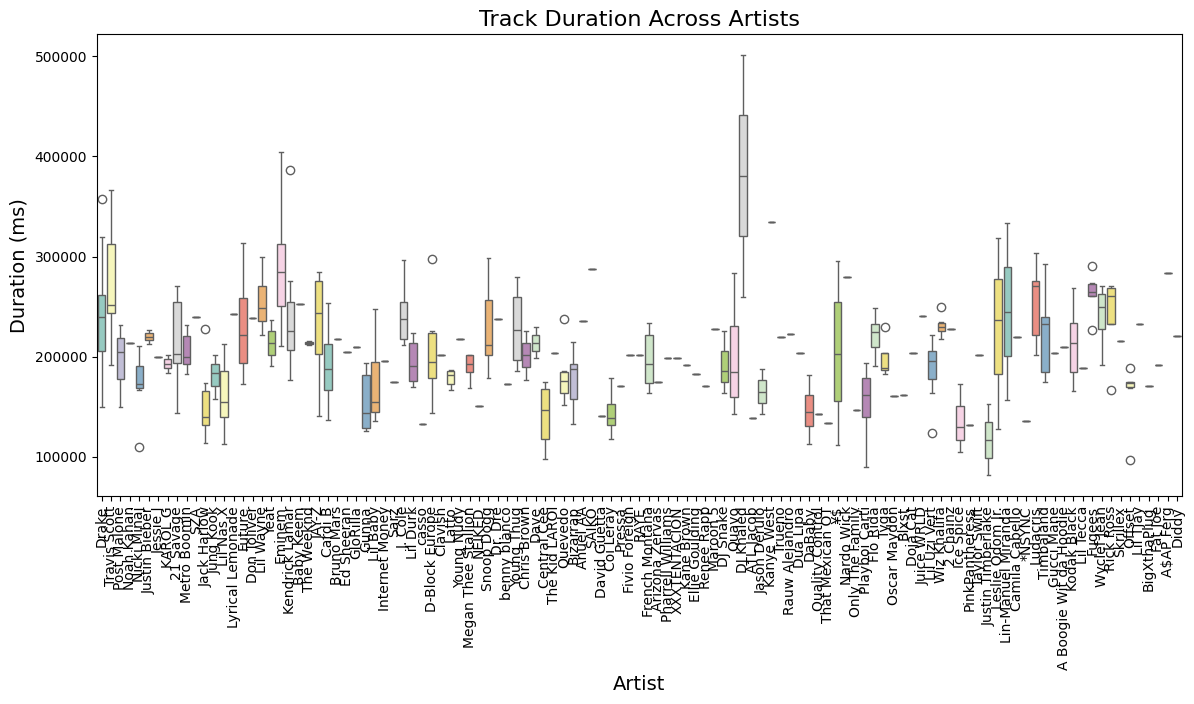

In [12]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=spotify_data_cleaned, x='Artist', y='Duration (ms)', palette='Set3')
plt.xticks(rotation=90)
plt.title('Track Duration Across Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Duration (ms)', fontsize=14)
plt.show()


10. Popularity distribution for different artists (violin plot)

<ipython-input-13-aba7afc9a647>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=spotify_data_cleaned, x='Artist', y='Popularity', palette='Set2')


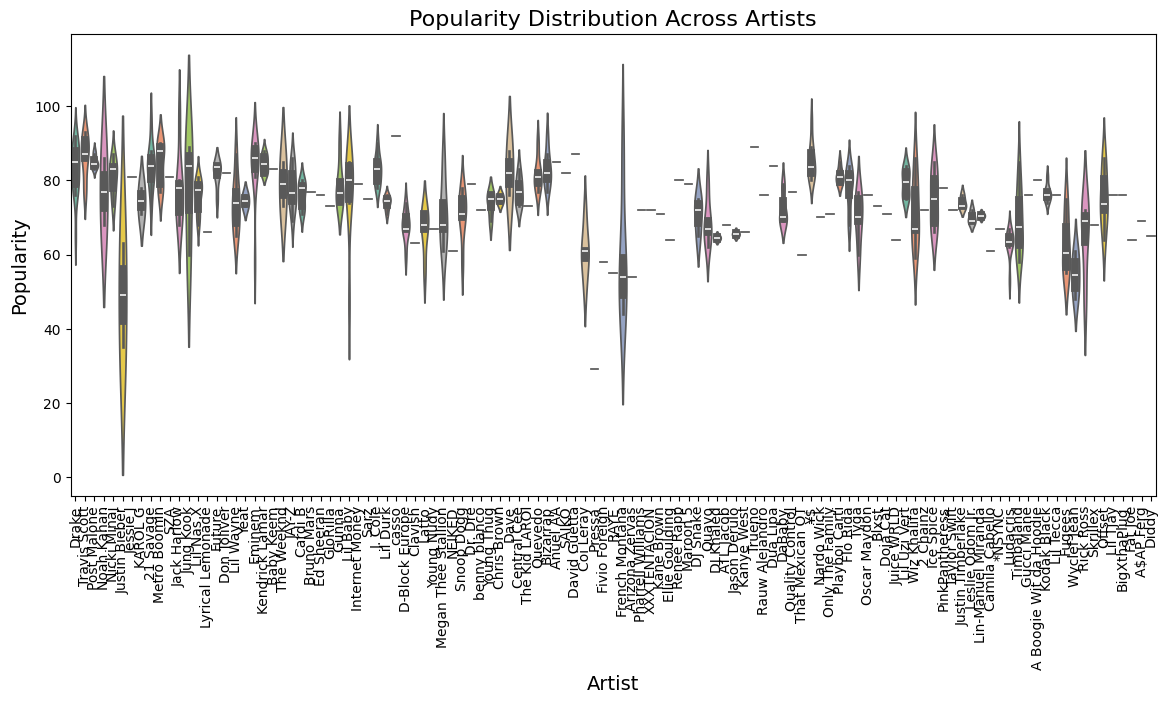

In [13]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=spotify_data_cleaned, x='Artist', y='Popularity', palette='Set2')
plt.xticks(rotation=90)
plt.title('Popularity Distribution Across Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.show()
